1. What is unsupervised learning?

Unsupervised learning is a type of machine learning where the model learns patterns from unlabeled data. The algorithm identifies hidden structures, similarities, or groupings without predefined output labels.

2. How does K-Means clustering work?

K-Means works by:

Choosing K initial centroids

Assigning each data point to the nearest centroid

Updating centroids as the mean of assigned points

Repeating until centroids no longer change

3. What is a dendrogram?

A dendrogram is a tree-like diagram used in hierarchical clustering that shows how clusters are merged or split at different distance levels.

4. Difference between K-Means and Hierarchical Clustering

| K-Means            | Hierarchical              |
| ------------------ | ------------------------- |
| Needs K beforehand | No need for K             |
| Fast and scalable  | Computationally expensive |
| Flat clusters      | Tree structure            |


5. Advantages of DBSCAN over K-Means

Does not require number of clusters

Handles noise/outliers

Detects arbitrarily shaped clusters

6. When to use Silhouette Score?

Used to evaluate clustering quality, measuring how well data points fit within their clusters.

7. Limitations of Hierarchical Clustering

High time complexity

Not scalable to large datasets

Cannot undo previous merges

8. Why is feature scaling important?

Distance-based algorithms like K-Means are sensitive to scale. Features with larger ranges dominate distance calculations.

9. How does DBSCAN identify noise?

Points that do not meet the minimum number of neighbors (min_samples) within radius (eps) are labeled as noise.

10. Define inertia in K-Means

Inertia is the sum of squared distances of points from their cluster centroids.

11. What is the elbow method?

A technique to find optimal K by plotting inertia vs K and identifying the point where improvement slows.

12. Density in DBSCAN

Density refers to the number of points within an ε-neighborhood.

13. Can hierarchical clustering handle categorical data?

Yes, with appropriate distance metrics (e.g., Hamming distance).



14. What does a negative Silhouette Score mean?

The data point is likely assigned to the wrong cluster.

15. What is linkage criteria?

Defines how distance between clusters is calculated (single, complete, average, ward).

16. Why K-Means performs poorly with varying densities?

It assumes spherical, equally sized clusters.

17. Core parameters of DBSCAN

eps: neighborhood radius

min_samples: minimum points to form a cluster

18. How K-Means++ improves K-Means?

It initializes centroids far apart, reducing poor convergence.

19. What is agglomerative clustering?

A bottom-up hierarchical method where individual points merge into clusters.

20. Why Silhouette Score is better than inertia?

Silhouette considers both cohesion and separation, unlike inertia.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import *
from sklearn.cluster import *
from sklearn.preprocessing import *
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage


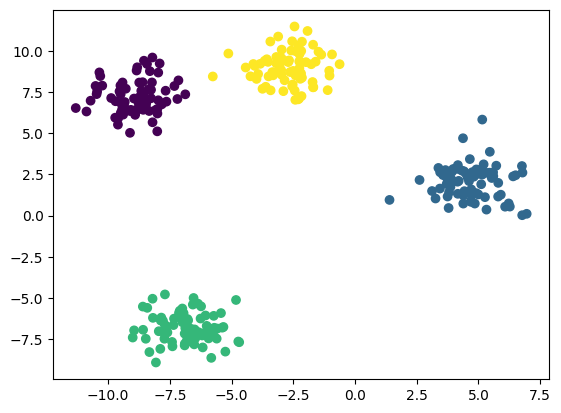

In [2]:
#  21) Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


In [3]:
# 22) Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels

X = load_iris().data
model = AgglomerativeClustering(n_clusters=3)
labels = model.fit_predict(X)
print(labels[:10])


[1 1 1 1 1 1 1 1 1 1]


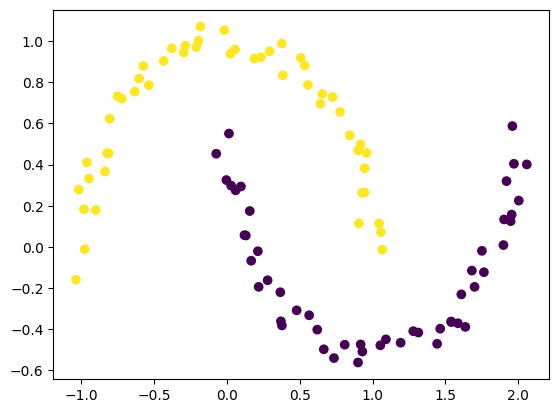

In [4]:
# 23) Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot

X, _ = make_moons(noise=0.05)
db = DBSCAN(eps=0.3)
labels = db.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


In [5]:
# 24) Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster

X = StandardScaler().fit_transform(load_wine().data)
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)
print(np.bincount(labels))


[62 65 51]


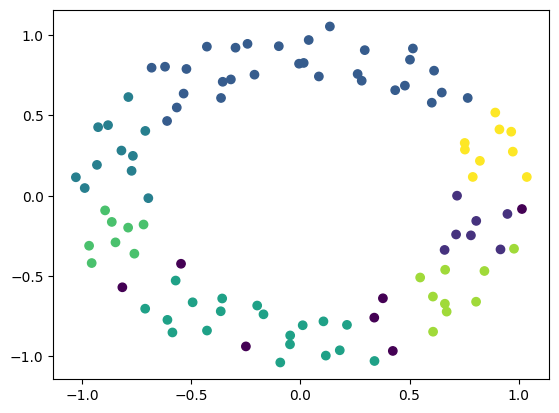

In [6]:
# 25)  Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result

X, _ = make_circles(noise=0.05)
labels = DBSCAN(eps=0.2).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


In [7]:
# 26) Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids

X = MinMaxScaler().fit_transform(load_breast_cancer().data)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
print(kmeans.cluster_centers_)


[[0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]
 [0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]]


In [8]:
# 27) Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN

X, _ = make_blobs(cluster_std=[1,2,3])
labels = DBSCAN(eps=1.5).fit_predict(X)


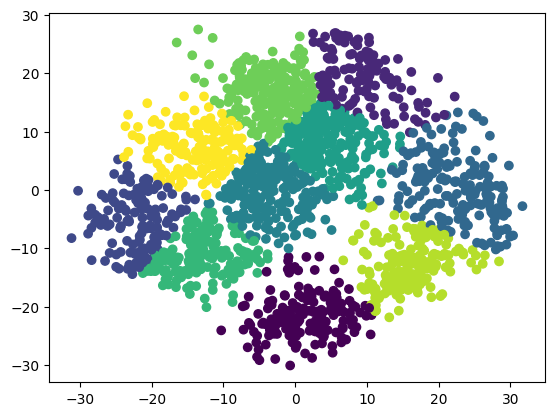

In [9]:
# 28) Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means

X = PCA(2).fit_transform(load_digits().data)
labels = KMeans(10).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


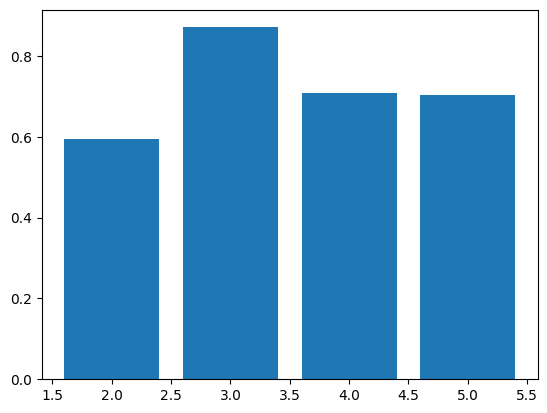

In [10]:
# 29)  Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart

X, _ = make_blobs()
scores = []
for k in range(2,6):
    scores.append(silhouette_score(X, KMeans(k).fit_predict(X)))
plt.bar(range(2,6), scores)
plt.show()


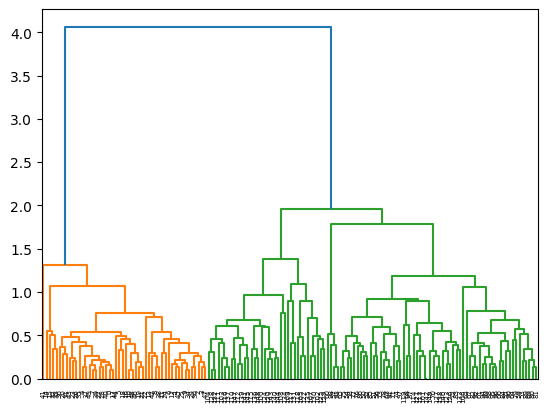

In [11]:
# 30)  Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage

Z = linkage(load_iris().data, method='average')
dendrogram(Z)
plt.show()


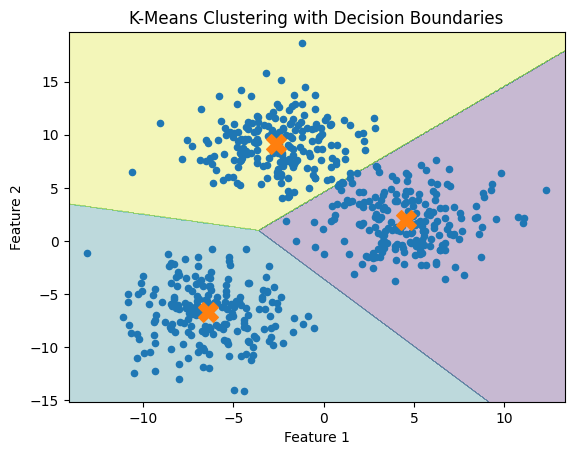

In [12]:
# 31) Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Generate synthetic data with overlapping clusters
X, y = make_blobs(
    n_samples=600,
    centers=3,
    cluster_std=2.5,   # higher value → more overlap
    random_state=42
)

# 2. Apply K-Means clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(X)

# 3. Create a mesh grid for decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

# 4. Predict cluster labels for each point in the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 5. Plot decision boundaries and data points
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], s=20)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    marker='X'
)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering with Decision Boundaries")
plt.show()


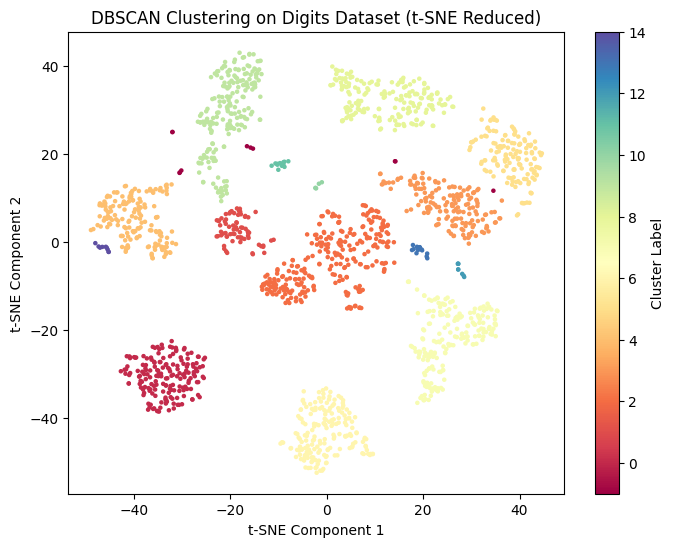

In [38]:
# 32) Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load Digits dataset
X, y = load_digits(return_X_y=True)

# Scale the data
X_scaled = StandardScaler().fit_transform(X)

# Reduce dimensions using t-SNE
X_tsne = TSNE(n_components=2, random_state=42, init='pca').fit_transform(X_scaled)

# Apply DBSCAN
# Parameters for DBSCAN might need tuning depending on the dataset characteristics
dbscan = DBSCAN(eps=3, min_samples=5)
labels = dbscan.fit_predict(X_tsne)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='Spectral', s=5)
plt.title('DBSCAN Clustering on Digits Dataset (t-SNE Reduced)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

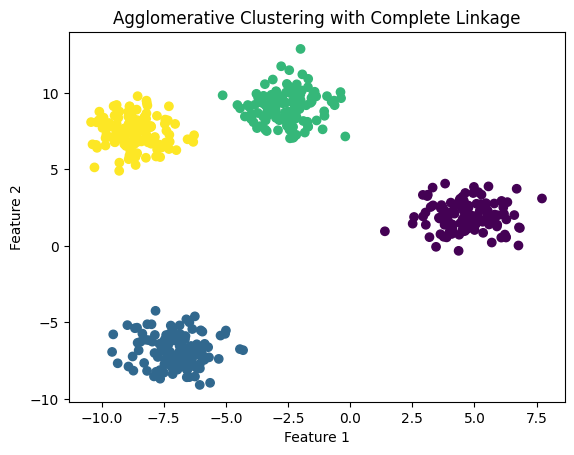

In [39]:
# 33) Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=500, centers=4, random_state=42)

agglo = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agglo.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Agglomerative Clustering with Complete Linkage")
plt.show()


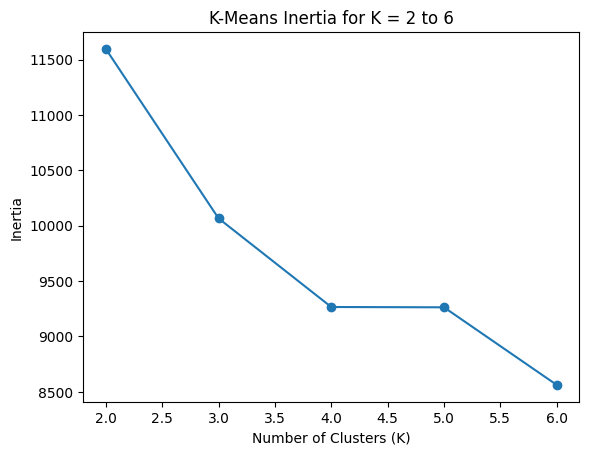

In [40]:
# 34)  Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot

from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load Breast Cancer dataset
X = load_breast_cancer().data

# Scale the data
X = StandardScaler().fit_transform(X)

# Compute inertia for K = 2 to 6
k_values = range(2, 7)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot inertia values
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("K-Means Inertia for K = 2 to 6")
plt.show()


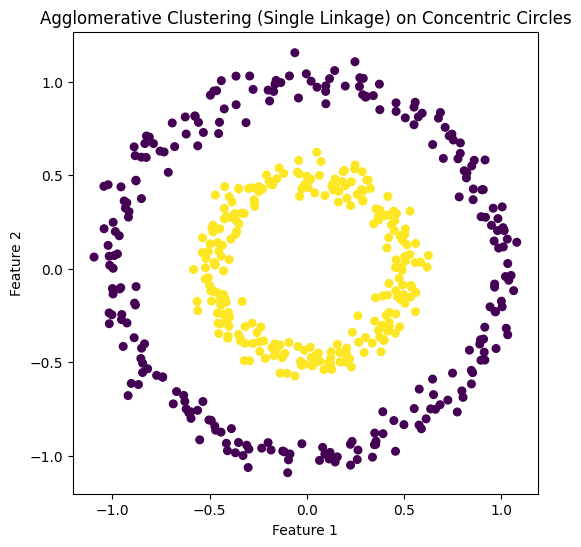

In [16]:
# 35) Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage


# Generate synthetic concentric circles data
X, y = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

# Apply Agglomerative Clustering with single linkage
agglo = AgglomerativeClustering(
    n_clusters=2,
    linkage='single'
)

labels = agglo.fit_predict(X)

# Plot the clustering result
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=30)
plt.title("Agglomerative Clustering (Single Linkage) on Concentric Circles")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [17]:
# 36) Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters


# Load the Wine dataset
wine = load_wine()
X = wine.data

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Count number of clusters (excluding noise label -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Count number of noise points
n_noise = list(labels).count(-1)

print("Number of clusters:", n_clusters)
print("Number of noise points:", n_noise)


Number of clusters: 0
Number of noise points: 178


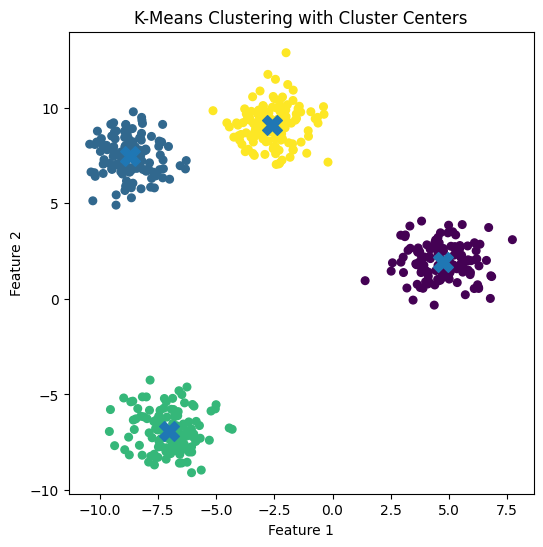

In [18]:
# 37) Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points



# Generate synthetic data using make_blobs
X, y = make_blobs(
    n_samples=500,
    centers=4,
    cluster_std=1.0,
    random_state=42
)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# Get cluster centers
centers = kmeans.cluster_centers_

# Plot data points
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=30)

# Plot cluster centers
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    marker='X',
    s=200
)

plt.title("K-Means Clustering with Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [19]:
# 38) Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise

X = load_iris().data
X = StandardScaler().fit_transform(X)

labels = DBSCAN(eps=0.5, min_samples=5).fit_predict(X)

noise_count = list(labels).count(-1)
print(noise_count)


34


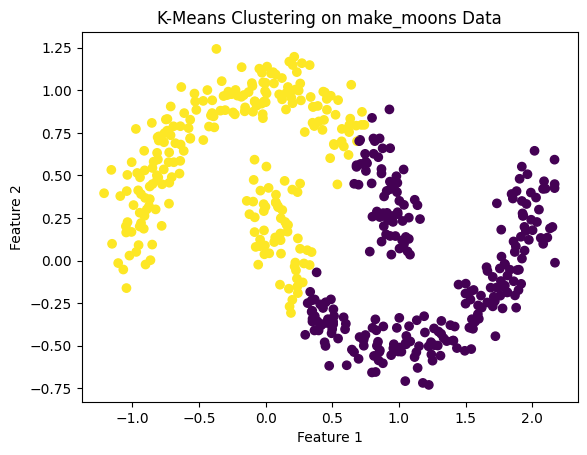

In [23]:
# 39) Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result


X, y = make_moons(n_samples=500, noise=0.1, random_state=42)

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering on make_moons Data")
plt.show()


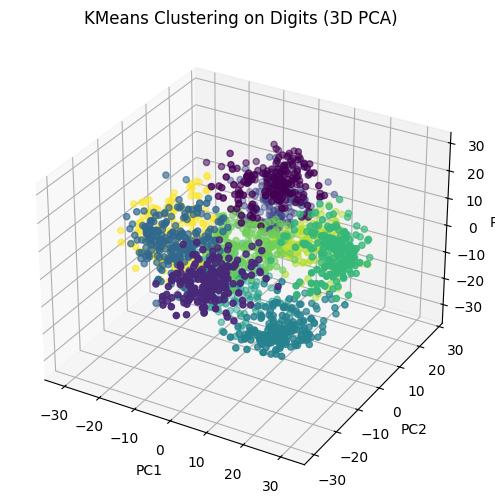

In [25]:
# 40) Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot

from mpl_toolkits.mplot3d import Axes3D # Corrected import for 3D plotting
# Load Digits dataset
X, y = load_digits(return_X_y=True)

# Reduce to 3 components using PCA
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# 3D scatter plot
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, s=20)
ax.set_xlabel('PC1') # Corrected and added placeholder for x-axis label
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('KMeans Clustering on Digits (3D PCA)')
plt.show()

Silhouette Score: 0.678738720085253


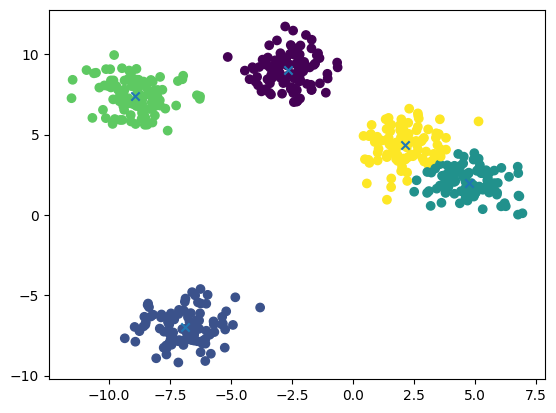

In [26]:
# 41) Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering



X, _ = make_blobs(n_samples=500, centers=5, random_state=42)

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

score = silhouette_score(X, labels)
print("Silhouette Score:", score)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1], marker='x')
plt.show()


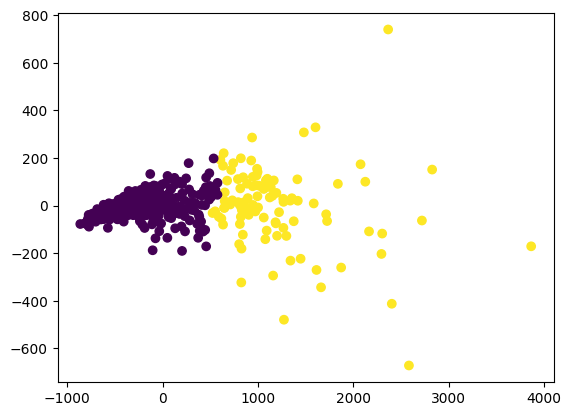

In [27]:
# 42) Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D


data = load_breast_cancer()
X = data.data

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

model = AgglomerativeClustering(n_clusters=2)
labels = model.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.show()


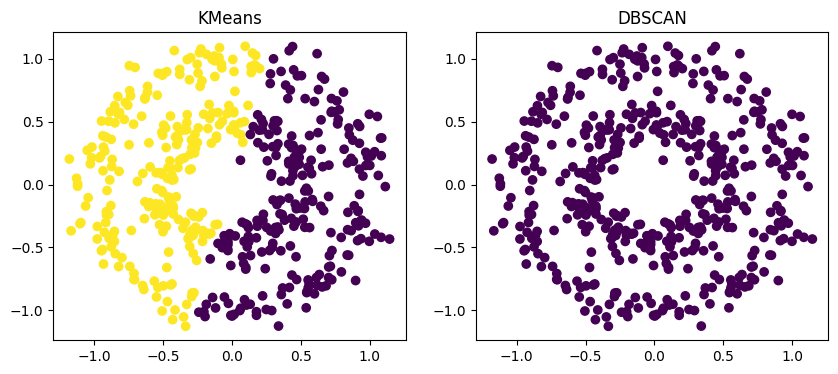

In [28]:
# 43) Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side

X, _ = make_circles(n_samples=500, noise=0.1, factor=0.5)

kmeans = KMeans(n_clusters=2, random_state=42)
k_labels = kmeans.fit_predict(X)

dbscan = DBSCAN(eps=0.2)
d_labels = dbscan.fit_predict(X)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=k_labels)
plt.title("KMeans")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=d_labels)
plt.title("DBSCAN")

plt.show()


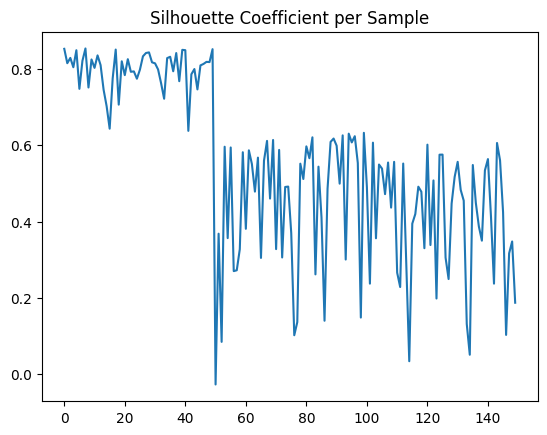

In [30]:
# 44)  Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering

from sklearn.metrics import silhouette_samples

X = load_iris().data

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

sil_samples = silhouette_samples(X, labels)

plt.plot(sil_samples)
plt.title("Silhouette Coefficient per Sample")
plt.show()


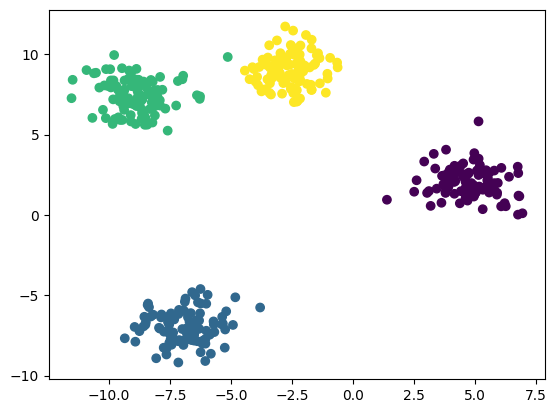

In [31]:
# 45) Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters



X, _ = make_blobs(n_samples=400, centers=4, random_state=42)

model = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()


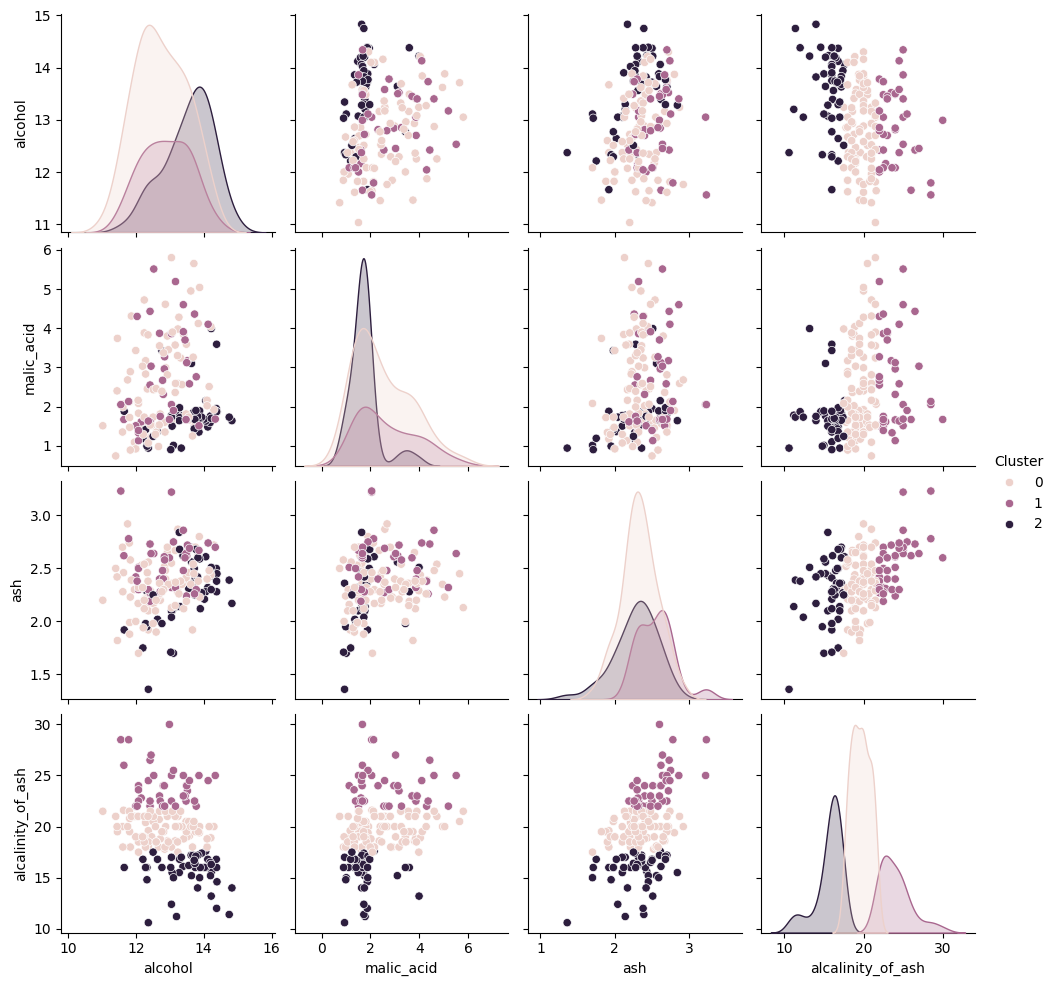

In [33]:
# 46)  Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot

import pandas as pd
import seaborn as sns

wine = load_wine()
X = wine.data[:, :4]

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

df = pd.DataFrame(X, columns=wine.feature_names[:4])
df['Cluster'] = labels

sns.pairplot(df, hue='Cluster')
plt.show()

In [34]:
# 47) Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count

from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

X, _ = make_blobs(n_samples=500, centers=3, cluster_std=1.2, random_state=42)

dbscan = DBSCAN(eps=0.5)
labels = dbscan.fit_predict(X)

noise_count = np.sum(labels == -1)
cluster_count = len(set(labels)) - (1 if -1 in labels else 0)

print("Clusters:", cluster_count)
print("Noise points:", noise_count)


Clusters: 8
Noise points: 74


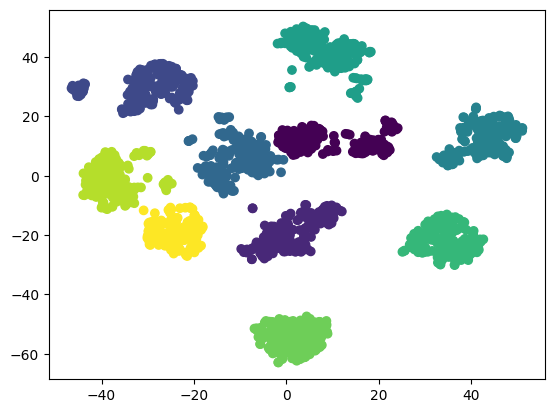

In [35]:
# 48)  Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data

X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)

model = AgglomerativeClustering(n_clusters=10)
labels = model.fit_predict(X_tsne)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.show()
